# Amazon Business Insight

### Project Objective

* Analyse Amazon India sale dataset 
* Extract different types of insights from the dataset.
* Use different types of graphs to gain insights.
* Use dataset to build machine learning models.



### Data Source

URL = https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data

Features

*   product_id - Product ID

*   product_name - Name of the Product

*   category - Category of the Product

*   discounted_price - Discounted Price of the Product

*   actual_price - Actual Price of the Product

*   discount_percentage - Percentage of Discount for the Product

*   ating - Rating of the Product

*   rating_count - Number of people who voted for the Amazon rating

*   about_product - Description about the Product

*   user_id - ID of the user who wrote review for the Product

*   user_name - Name of the user who wrote review for the Product

*   review_id - ID of the user review

*   review_title - Short review

*   review_content - Long review

*   img_link - Image Link of the Product

*   product_link - Official Website Link of the Product

### Languages, Libraries and Softwares used

<b>Working environment</b> Visual Studio Code 

<b>Languages</b> Python

<b>Data Manipulation</b> Pandas(Lib)

<b>Data Visualization</b> Seaborn(Lib), Plotly(Lib), Power BI(Soft)

<b>Machine Learning</b> Scikit-Learn(Lib)

In [832]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing


%matplotlib inline 

## 1.Data Collection

#### Loading data

In [833]:
df = pd.read_csv("Files/amazon.csv")

In [834]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


## 2.Data Wrangling

* Handling missing values
* Correct data fromatting
* Standardize and normalize data

Dropping unecessary columns

In [835]:
columns = ["about_product"	,"user_id",	"user_name","review_id","review_title","review_content"	,"img_link","product_link"]
df.drop(columns, axis=1, inplace=True)
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269"
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994"
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928"


Checking columns data type

In [836]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
dtype: object

Removing Special Symbols from Dataset

In [837]:
df["discounted_price"] = df["discounted_price"].str.replace("₹","").str.replace(",","")
df["actual_price"] = df["actual_price"].str.replace("₹","").str.replace(",","")
df["discount_percentage"] = df["discount_percentage"].str.replace("%","").str.replace("|", "")
df["rating"] = df["rating"].str.replace("|", "").replace("", np.nan)
df["rating_count"] = df["rating_count"].str.replace(",","").replace("|", np.nan)
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994


Changing colmuns data type to the desired one

In [838]:
df["discounted_price"] = df["discounted_price"].astype(float)
df["actual_price"] = df["actual_price"].astype(float)
df["discount_percentage"] = df["discount_percentage"].astype(float)
df["rating"] = df["rating"].astype(float)
df["rating_count"] = df["rating_count"].astype(float)

Re-formatting column to a desired one

In [839]:
# Converting discounted_price actual_price to USD
# The rate used is from Feb 2023,the closest date to when dataset was uploaded
# For more information: https://www.exchange-rates.org/exchange-rate-history/inr-usd-2023
df["discounted_price"] = df["discounted_price"]*0.01209
df["actual_price"] = df["actual_price"]*0.01209

# Dividing discount_percentage by 100
df["discount_percentage"] = df["discount_percentage"]/100


In [840]:
#Rounding up 2 decimal places columns discounted_price and actual_price
df["discounted_price"] = df["discounted_price"].round(2)
df["actual_price"] = df["actual_price"].round(2)

In [841]:
#Renaming columns
df.rename( columns={"discounted_price":"discounted_USD", "actual_price":"price_USD"}, inplace=True)

In [842]:
df.head(3)

,product_id,product_name,category,discounted_USD,price_USD,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.82,13.29,0.64,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,2.41,4.22,0.43,4.0,43994.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,2.41,22.96,0.90,3.9,7928.0


Identifying and calculating the percentage of missing values in each attribute

In [843]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_USD         0
price_USD              0
discount_percentage    0
rating                 1
rating_count           2
dtype: int64

Dropping rows with null ratings

In [844]:
df.dropna(inplace=True)

Checking if the null ratings rows have been deleted

In [845]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_USD         0
price_USD              0
discount_percentage    0
rating                 0
rating_count           0
dtype: int64

Converting column category into indicator variables

In [846]:
df["category"].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [847]:
categories = ["computer&Accessories", 
              "Eletronics", 
              "Home&Kitchen",
              "OfficeProducts",
              "Toys&Games",
              "HomeImprovement",
              "Car&Motorbike",
              "Health&PersonalCare"]


In [848]:
for x in range(0,3):
    for i, value in enumerate(df["category"]):
        arr = value.split("|")
        df.loc[i, 'category'] = arr[0]
    

In [849]:
df["category"].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

Binning

In [850]:
bins = np.linspace(min(df["price_USD"]), max(df["price_USD"]),4)
group_names = ["Low","Medium","High"]

df["price-binned"] = pd.cut(df["price_USD"], bins, labels=group_names,include_lowest=True)
df[["price_USD","price-binned","rating"]].head()

,price_USD,price-binned,rating
0,13.29,Low,4.2
1,4.22,Low,4.0
2,22.96,Low,3.9
3,8.45,Low,4.2
4,4.82,Low,4.2


In [851]:
df.head()

,product_id,product_name,category,discounted_USD,price_USD,discount_percentage,rating,rating_count,price-binned
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,4.82,13.29,0.64,4.2,24269.0,Low
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,2.41,4.22,0.43,4.0,43994.0,Low
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,2.41,22.96,0.90,3.9,7928.0,Low
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,3.98,8.45,0.53,4.2,94363.0,Low
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,1.86,4.82,0.61,4.2,16905.0,Low


In [852]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.isnull().sum()

product_id             3
product_name           3
category               0
discounted_USD         3
price_USD              3
discount_percentage    3
rating                 3
rating_count           3
price-binned           3
dtype: int64


product_id             0
product_name           0
category               0
discounted_USD         0
price_USD              0
discount_percentage    0
rating                 0
rating_count           0
price-binned           0
dtype: int64

In [853]:
df.to_csv("Files/amazon_dataset_processed.csv")

In [854]:
print(df.isnull().sum())
df["category"].unique()

product_id             0
product_name           0
category               0
discounted_USD         0
price_USD              0
discount_percentage    0
rating                 0
rating_count           0
price-binned           0
dtype: int64


array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

## 3.Exploratory Data Analysis

* Explore features or characterists for predictions
* Analyze patterns and run descriptive statistical analysis


In [855]:
df = pd.read_csv("Files/amazon_dataset_processed.csv")

### EDA with Continuous Data

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [856]:
def pearson_coef_decision(pcoef):
    
    if(pcoef > 0.5 and pcoef < 1):
        return "Positive Linear correlation"
    elif (pcoef <= 0.5 and pcoef > 0):
       return "Weak Positive Linear correlation"
    elif(pcoef <= 0 and pcoef >= -0.5):
        return "Weak Negative Linear correlation"   
    elif(pcoef < 0.5 and pcoef > -1):
        return "Strong Negative Linear correlation"   
    elif(pcoef == -1):
        return "Perfect Negative Linear Correlation"   
    elif(pcoef == 0):
        return "No Linear Correlation, between both variables"   
    elif(pcoef == 1):
        return "Perfect Positive Linear Correlation"   
    


def p_value_decision(p_value):
    if(p_value < 0.001):
        return "Strong evidence that the correlation is significant"
    elif (p_value < 0.05):
       return "Moderate evidence that the correlation is significant"
    elif(p_value < 0.1):
        return "Weak evidence that the correlation is significant"   
    elif(p_value > 0.1):
        return "No evidence that the correlation is significant"  
    


def calc_statistics(price,discount, discount_pct,rating_count):
    pearson_coefs = []
    p_values = []
    pearson_coefs_meaning = []
    p_values_meaning = []

    data = [price["data"],discount["data"], discount_pct["data"],rating_count["data"]]
    names = [price["name"],discount["name"], discount_pct["name"],rating_count["name"]]

    for column in data:
        pearson_coef, p_value = pearsonr(column, df["rating"])
        pearson_coefs.append(pearson_coef)
        p_values.append(p_value)
        pearson_coefs_meaning.append(pearson_coef_decision(pearson_coef))
        p_values_meaning.append(p_value_decision(p_value))

       
    data = {
        "name" : names,
        "pearson_Coef" : pearson_coefs,
        "pearson_Coef_Meaning": pearson_coefs_meaning,
        "p_value" : p_values,
        "p_value_Meaning": p_values_meaning
    }

    dataframe = pd.DataFrame(data)
    return dataframe

In [857]:
price = {
    "name": "Price",
    "data": df["price_USD"],
    "pvalue": [0,""],
    "pcoef": [0,""]
}

discount = {
    "name": "discount",
    "data": df["discounted_USD"],
    "pvalue": [0,""],
    "pcoef": [0,""]
}

discount_pct = {
    "name": "Discount Percentage",
    "data": df["discount_percentage"],
    "pvalue": [0,""],
    "pcoef": [0,""]
}

rating_count = {
    "name": "Rating Count",
    "data": df["rating_count"],
    "pvalue": [0,""],
    "pcoef": [0,""]
}

stats = calc_statistics(price,discount,discount_pct,rating_count)


In [858]:
stats.head()

,name,pearson_Coef,pearson_Coef_Meaning,p_value,p_value_Meaning
0,Price,0.122468,Weak Positive Linear correlation,2.648256e-06,Strong evidence that the correlation is signif...
1,discount,0.121132,Weak Positive Linear correlation,3.404592e-06,Strong evidence that the correlation is signif...
2,Discount Percentage,-0.155679,Weak Negative Linear correlation,2.177410e-09,Strong evidence that the correlation is signif...
3,Rating Count,0.102235,Weak Positive Linear correlation,9.003676e-05,Strong evidence that the correlation is signif...


In [859]:
stats.loc[0]

name                                                                Price
pearson_Coef                                                     0.122468
pearson_Coef_Meaning                     Weak Positive Linear correlation
p_value                                                          0.000003
p_value_Meaning         Strong evidence that the correlation is signif...
Name: 0, dtype: object

Visualizing the relation between price and rating

(0.0, 1780.7769511668712)

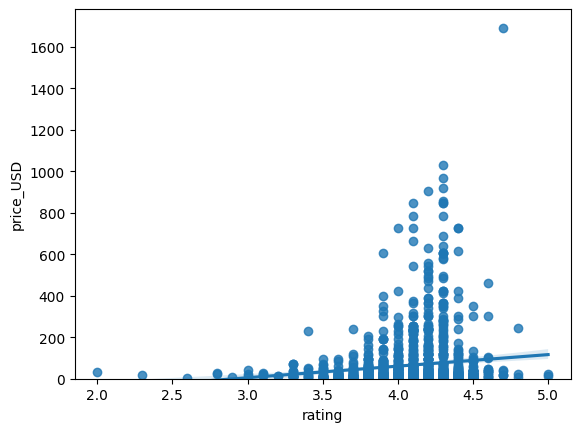

In [860]:
sns.regplot(y="price_USD",
            x="rating",
            data=df)
plt.ylim(0,)

Conclusions...

Visualizing the relation between Discount Percentage and rating

In [861]:
stats.loc[2]

name                                                  Discount Percentage
pearson_Coef                                                    -0.155679
pearson_Coef_Meaning                     Weak Negative Linear correlation
p_value                                                               0.0
p_value_Meaning         Strong evidence that the correlation is signif...
Name: 2, dtype: object

(0.0, 0.987)

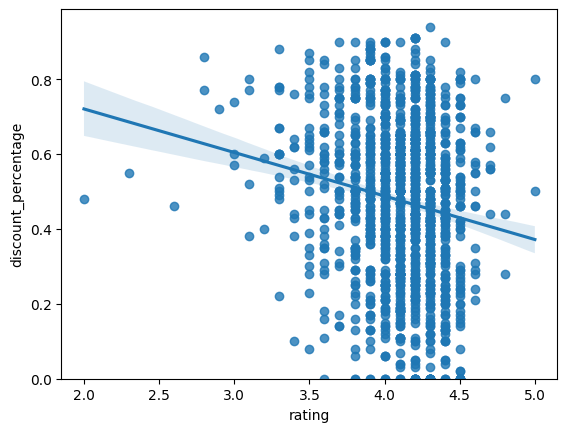

In [862]:
sns.regplot(y="discount_percentage",
            x="rating",
            data=df)
plt.ylim(0,)

##### Conclusion


Visualizing the relation between Discount and Rating

In [863]:
stats.loc[1]

name                                                             discount
pearson_Coef                                                     0.121132
pearson_Coef_Meaning                     Weak Positive Linear correlation
p_value                                                          0.000003
p_value_Meaning         Strong evidence that the correlation is signif...
Name: 1, dtype: object

(0.0, 993.1521146839052)

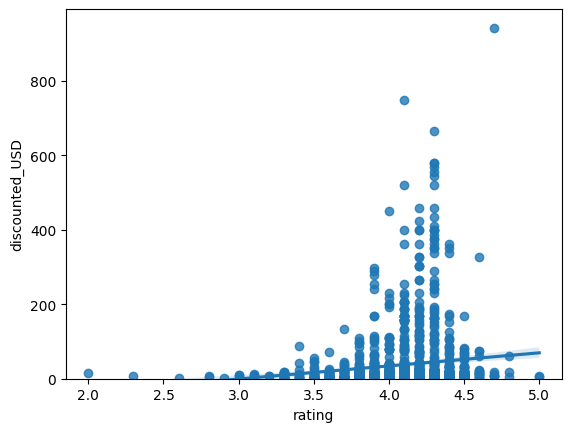

In [864]:
sns.regplot(y="discounted_USD",
            x="rating",
            data=df)
plt.ylim(0,)

Visualizing the relation between Rating Count and Rating

In [865]:
stats.iloc[3]

name                                                         Rating Count
pearson_Coef                                                     0.102235
pearson_Coef_Meaning                     Weak Positive Linear correlation
p_value                                                           0.00009
p_value_Meaning         Strong evidence that the correlation is signif...
Name: 3, dtype: object

(0.0, 449531.3251551102)

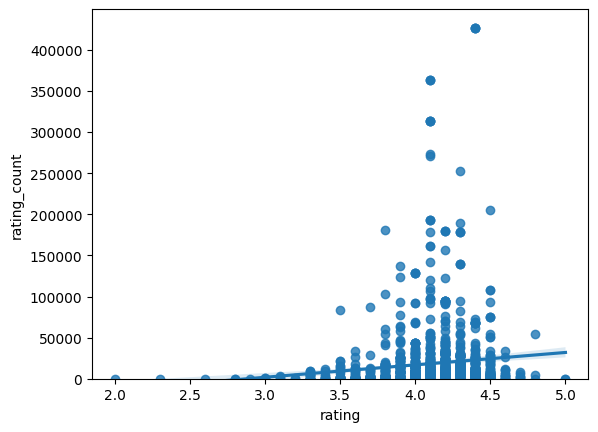

In [866]:
sns.regplot(y="rating_count",
            x="rating",
            data=df)
plt.ylim(0,)

#### Conclusions
Both graphs are a representation of a Weak Positive Linear correlation, and as expected despite being a strong evidence that the correlation is significant(p_value) the the graphs still don't manage to properly shoe the relationship between both data. 
Hence why I will try a different approach below.

### EDA With Categorical Data

(0.0, 5.0)

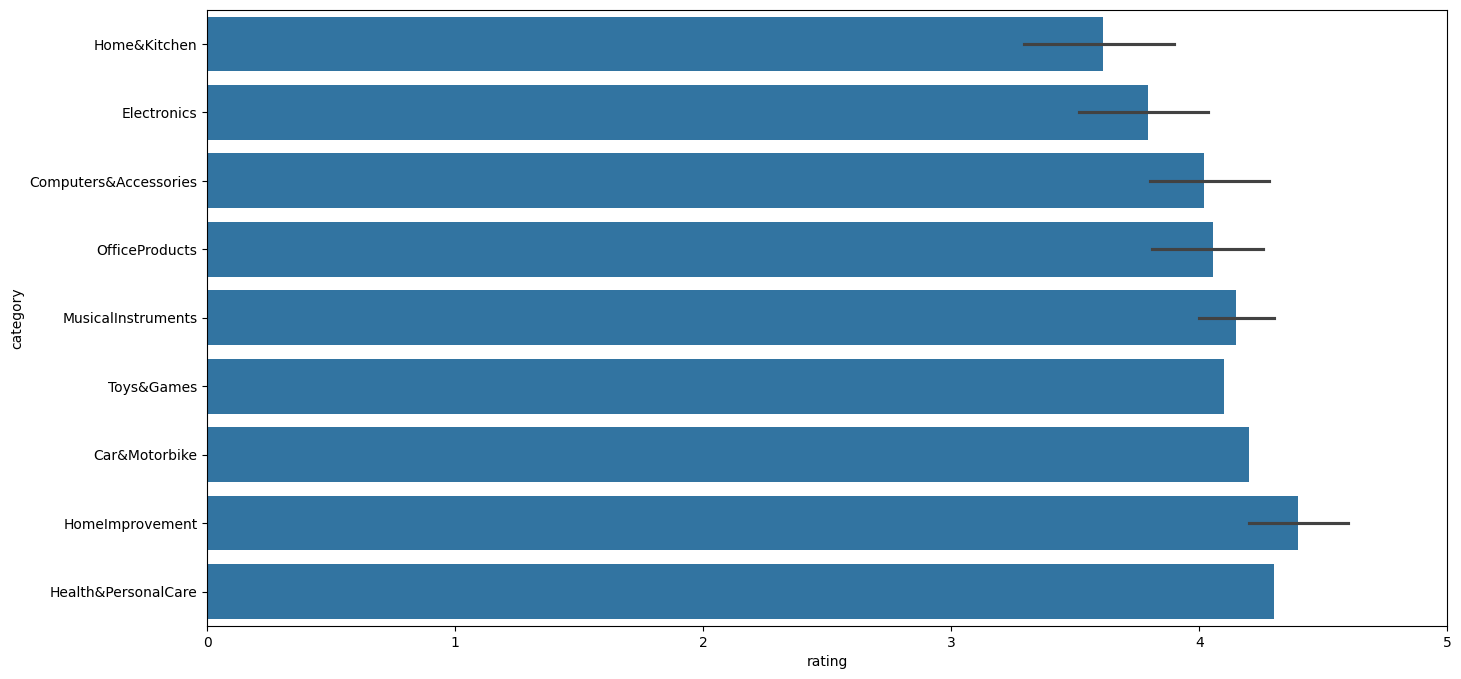

In [867]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_grouped = df.groupby(["category","rating"], as_index=False)[numeric_cols].mean()
df_grouped.sort_values("rating", inplace=True)
plt.figure(figsize=(16,8))
sns.barplot(data =df_grouped,
            y="category",
            x="rating")

plt.xlim(0,5)

Conclusions...

Visu

(0.0, 5.0)

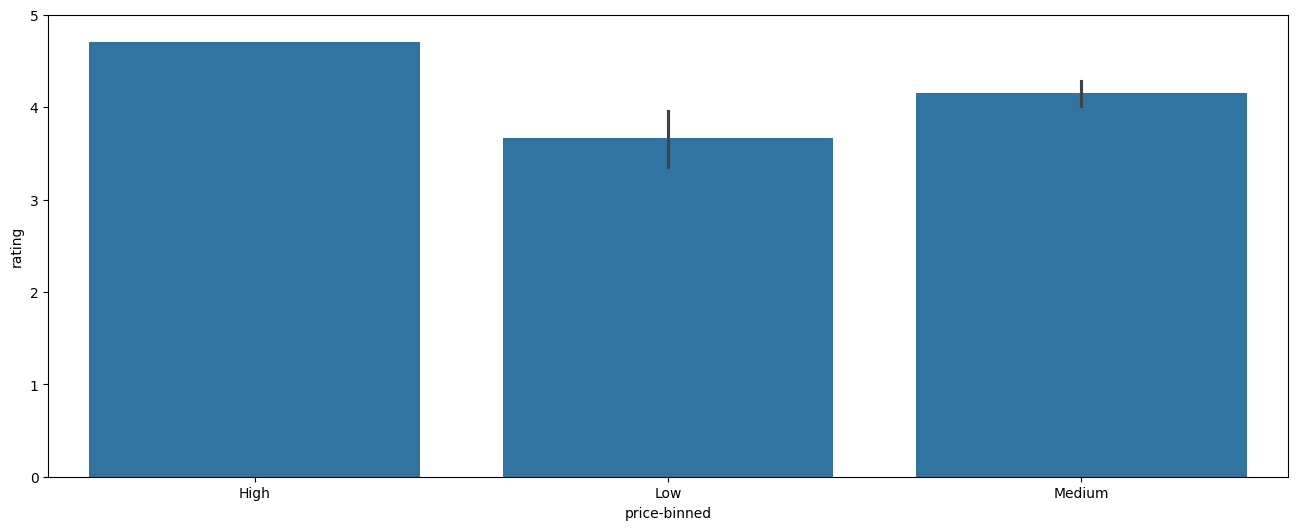

In [868]:

numeric_cols = df.select_dtypes(include=['number'])[numeric_cols] .columns
df_grouped = df.groupby(["price-binned","rating"], as_index=False)[numeric_cols].mean()
plt.figure(figsize=(16,6))
sns.barplot(data =  df_grouped,
            x="price-binned",
            y="rating")

plt.ylim(0,5)

#### Explanation
This graphs means that the higher the product's price the higher the rating, and thus logicaly supporting the claim that expensice products are better, or at least make the most satisfied customers.

<Axes: xlabel='price-binned', ylabel='rating_count'>

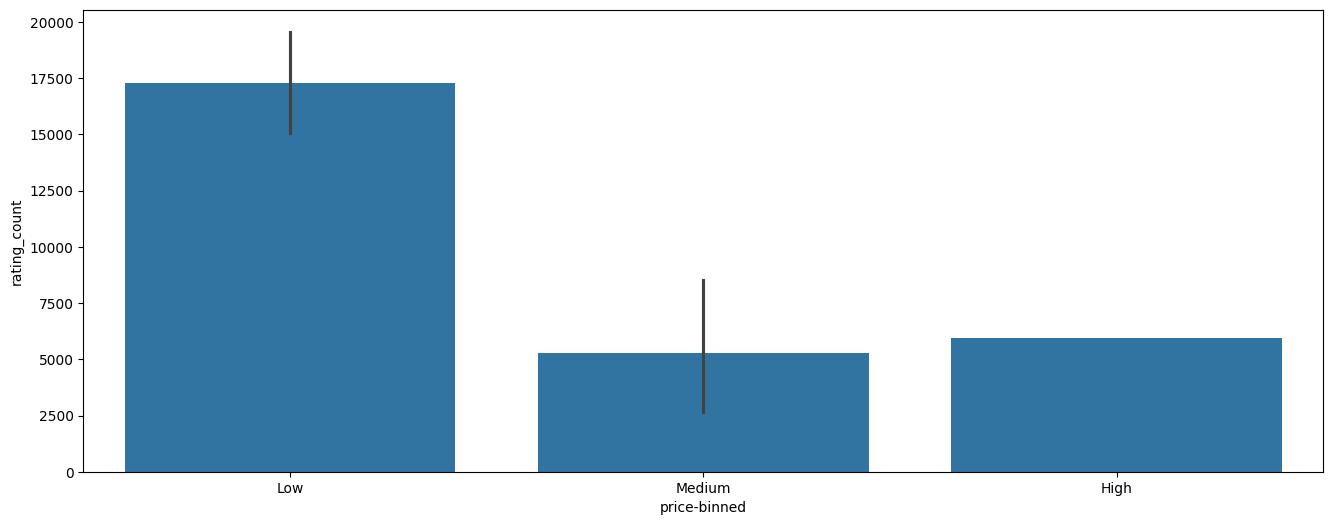

In [869]:
numeric_cols = df.select_dtypes(include=['number'])[numeric_cols].columns
df_grouped = df.groupby(["price-binned","rating_count"], as_index=False)[numeric_cols].mean()
df_grouped.sort_values("rating_count", inplace=True)
plt.figure(figsize=(16,6))
sns.barplot(data =df_grouped,  
            x="price-binned",
            y="rating_count")


#### Conclusions
The lower the price the higher the number of people who will leave a rating, meaning that people tend to do it since the product either didn't meet their expectations or the opposite.

## 4.Model Development

* Develop prediction model 


### Multiple Linear Regression Model - Predict Rating

In [870]:
df_mlr = pd.read_csv("Files/amazon_dataset_processed.csv")

In [871]:
df_mlr = pd.get_dummies(data=df_mlr, columns=["category","price-binned"])

In [872]:
df_mlr.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'discounted_USD',
       'price_USD', 'discount_percentage', 'rating', 'rating_count',
       'category_Car&Motorbike', 'category_Computers&Accessories',
       'category_Electronics', 'category_Health&PersonalCare',
       'category_Home&Kitchen', 'category_HomeImprovement',
       'category_MusicalInstruments', 'category_OfficeProducts',
       'category_Toys&Games', 'price-binned_High', 'price-binned_Low',
       'price-binned_Medium'],
      dtype='object')

In [873]:
df_mlr.drop("Unnamed: 0", axis=1, inplace=True)
df_mlr.head()

,product_id,product_name,discounted_USD,price_USD,discount_percentage,rating,rating_count,category_Car&Motorbike,category_Computers&Accessories,category_Electronics,category_Health&PersonalCare,category_Home&Kitchen,category_HomeImprovement,category_MusicalInstruments,category_OfficeProducts,category_Toys&Games,price-binned_High,price-binned_Low,price-binned_Medium
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.82,13.29,0.64,4.2,24269.0,False,True,False,False,False,False,False,False,False,False,True,False
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,2.41,4.22,0.43,4.0,43994.0,False,True,False,False,False,False,False,False,False,False,True,False
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,2.41,22.96,0.90,3.9,7928.0,False,True,False,False,False,False,False,False,False,False,True,False
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,3.98,8.45,0.53,4.2,94363.0,False,True,False,False,False,False,False,False,False,False,True,False
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,1.86,4.82,0.61,4.2,16905.0,False,True,False,False,False,False,False,False,False,False,True,False


In [874]:
lr = linear_model.LinearRegression()
x = np.asanyarray(df_mlr[["price_USD","discounted_USD","discount_percentage","rating_count","category_Car&Motorbike", "category_Computers&Accessories"	,"category_Electronics","category_Health&PersonalCare","category_Home&Kitchen","category_HomeImprovement","category_MusicalInstruments","category_OfficeProducts","category_Toys&Games", "price-binned_High","price-binned_Low","price-binned_Medium"]])
y = np.asanyarray(df_mlr[["rating"]])

In [875]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

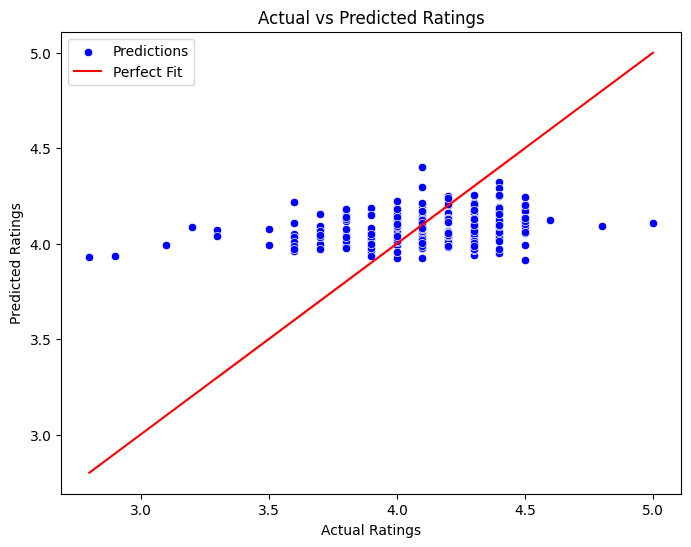

In [876]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test.flatten(), y=predictions.flatten(), color="blue", label="Predictions")
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), color="red", label="Perfect Fit")  # Ideal line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.legend()
plt.show()

In [877]:
y= x_test.reshape(-1)
y.shape

(4688,)

In [878]:
lr_MAE = np.mean(np.absolute(predictions - y_test)) # The lower the better
lr_MSE = np.mean((predictions - y_test) ** 2) # The lower the better
lr_R2 = r2_score(y_test, predictions) # the closer to 1 the better.

In [879]:
print(lr_MAE)
print(lr_MSE)
lr_R2

0.20524315826431616
0.0727416956212227


0.08153603414141941

#### Conclusions
* The MAE and MSE values are small indicating that the model predictions are not far off from the true values.
* The R^2 score sugests that the model is not explaining much of the variance the data, meaning it may not generalize well,and therefore, it's better to use more complex models.

### Multiple Linear Regression Model - Predict Rating Count

In [880]:
df_mlr = pd.read_csv("Files/amazon_dataset_processed.csv")
df_mlr = pd.get_dummies(data=df_mlr, columns=["category","price-binned"])

In [881]:
df_mlr.drop("Unnamed: 0", axis=1, inplace=True)
df_mlr.head()

,product_id,product_name,discounted_USD,price_USD,discount_percentage,rating,rating_count,category_Car&Motorbike,category_Computers&Accessories,category_Electronics,category_Health&PersonalCare,category_Home&Kitchen,category_HomeImprovement,category_MusicalInstruments,category_OfficeProducts,category_Toys&Games,price-binned_High,price-binned_Low,price-binned_Medium
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.82,13.29,0.64,4.2,24269.0,False,True,False,False,False,False,False,False,False,False,True,False
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,2.41,4.22,0.43,4.0,43994.0,False,True,False,False,False,False,False,False,False,False,True,False
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,2.41,22.96,0.90,3.9,7928.0,False,True,False,False,False,False,False,False,False,False,True,False
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,3.98,8.45,0.53,4.2,94363.0,False,True,False,False,False,False,False,False,False,False,True,False
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,1.86,4.82,0.61,4.2,16905.0,False,True,False,False,False,False,False,False,False,False,True,False


In [882]:
lr = linear_model.LinearRegression()
x = np.asanyarray(df_mlr[["price_USD","discounted_USD","discount_percentage","rating","category_Car&Motorbike", "category_Computers&Accessories"	,"category_Electronics","category_Health&PersonalCare","category_Home&Kitchen","category_HomeImprovement","category_MusicalInstruments","category_OfficeProducts","category_Toys&Games", "price-binned_High","price-binned_Low","price-binned_Medium"]])
y = np.asanyarray(df_mlr[["rating_count"]])

In [883]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
lr_MAE = np.mean(np.absolute(predictions - y_test))
lr_MSE = np.mean((predictions - y_test) ** 2) # The lower the better
lr_R2 = r2_score(y_test, predictions)
print(lr_MAE)
print(lr_MSE)
print(lr_R2)

20010.311131666327
1629198481.3666492
0.017022225321524642


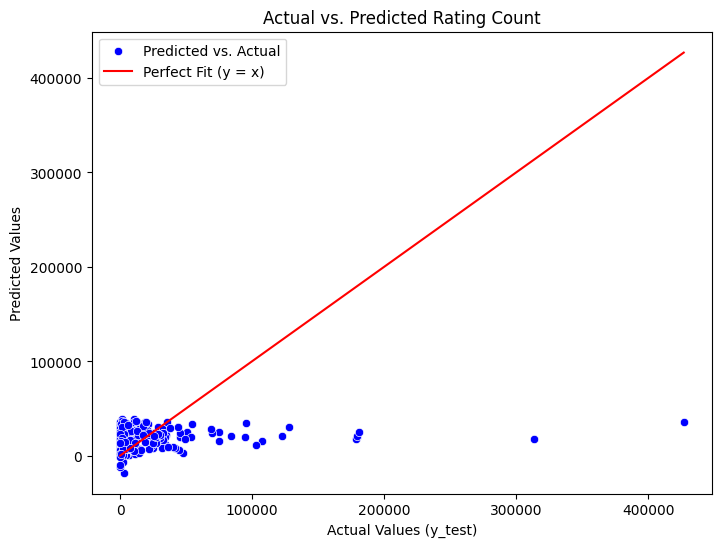

In [884]:
# Convert to 1D for plotting
y_test_flat = y_test.flatten()
predictions_flat = predictions.flatten()

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_flat, y=predictions_flat, color='blue', label="Predicted vs. Actual")
sns.lineplot(x=y_test_flat, y=y_test_flat, color='red', label="Perfect Fit (y = x)")

# Labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Rating Count")
plt.legend()
plt.show()

### KNN - Price Category

In [885]:
df_KNN = pd.read_csv("Files/amazon_dataset_processed.csv") 
df_KNN.drop("Unnamed: 0", axis=1, inplace=True)

In [886]:
df_KNN.columns

Index(['product_id', 'product_name', 'category', 'discounted_USD', 'price_USD',
       'discount_percentage', 'rating', 'rating_count', 'price-binned'],
      dtype='object')

In [887]:
df_KNN.drop(['product_id', 'product_name'], axis=1, inplace=True)
df_KNN.columns

Index(['category', 'discounted_USD', 'price_USD', 'discount_percentage',
       'rating', 'rating_count', 'price-binned'],
      dtype='object')

In [888]:
df_KNN = pd.get_dummies(data=df_KNN, columns=["category"])
df_KNN.columns

Index(['discounted_USD', 'price_USD', 'discount_percentage', 'rating',
       'rating_count', 'price-binned', 'category_Car&Motorbike',
       'category_Computers&Accessories', 'category_Electronics',
       'category_Health&PersonalCare', 'category_Home&Kitchen',
       'category_HomeImprovement', 'category_MusicalInstruments',
       'category_OfficeProducts', 'category_Toys&Games'],
      dtype='object')

In [889]:
y = df_KNN[["price-binned"]]

df_KNN.drop("price-binned", axis=1, inplace=True)
x = df_KNN

KNN_x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [890]:
x_train, x_test, y_train, y_test = train_test_split(KNN_x, y, test_size=0.2, random_state=4)

In [891]:
KNN = KNeighborsClassifier(n_neighbors=7).fit(x_train,y_train)
predict = KNN.predict(x_test)

#The higher the better, the closest both results are the better
print("Train set Accuracy", accuracy_score(y_train, KNN.predict(x_train)))
print("Test set Accuracy", accuracy_score(y_test, predict))

Train set Accuracy 0.998289136013687
Test set Accuracy 0.9965870307167235


C:\Users\Alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [892]:
h= .02
x_min, x_max = x_train[:, 0].min() -1, x_train[:, 0].max()+1
y_min, y_max = x_train[:, - 1].min() -1, x_train[:, 1].max()+1

#Creating meshgrid with 14 features
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Using np.c_ to concatenate xx, yy, and add 12 zeros the remaining 12 features
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.size,12))])

#Flattening and enconding the target variable for plottin
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train.values.ravel())

# COnverting Z to numeric type
Z_numeric = label_encoder.transform(Z)
Z_numeric = Z_numeric.reshape(xx.shape)


C:\Users\Alexi\AppData\Local\Temp\ipykernel_84116\79451901.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train[indices,0], x_train[indices,1], label=class_label, edgecolors='k', cmap=plt.cm.Paired)
C:\Users\Alexi\AppData\Local\Temp\ipykernel_84116\79451901.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train[indices,0], x_train[indices,1], label=class_label, edgecolors='k', cmap=plt.cm.Paired)
C:\Users\Alexi\AppData\Local\Temp\ipykernel_84116\79451901.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train[indices,0], x_train[indices,1], label=class_label, edgecolors='k', cmap=plt.cm.Paired)
C:\Users\Alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with 

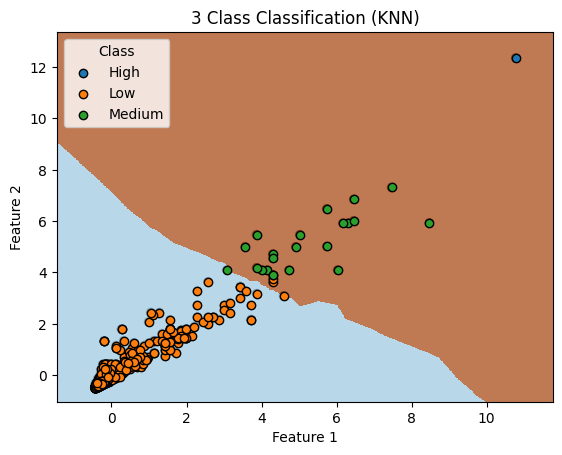

In [893]:

scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_encoded, edgecolors="k",cmap=plt.cm.Paired)
plt.pcolormesh(xx, yy, Z_numeric, cmap=plt.cm.Paired, alpha=0.8)

# Setting labels and title
plt.title("3 Class Classification (KNN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

#Creatign a legend for the scatter plot
legend_labels = label_encoder.classes_

#Creating a legend for each class
for class_label in legend_labels:
    indices = np.where(y_encoded == label_encoder.transform([class_label])[0])  
    plt.scatter(x_train[indices,0], x_train[indices,1], label=class_label, edgecolors='k', cmap=plt.cm.Paired)

# Setting labels and title
plt.title("3 Class Classification (KNN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show legend
plt.legend(title="Class") 

plt.show()

Hyperparameter tunning

In [894]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2,30,1)

for neighbor in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=neighbor)
    KNN.fit(x_train, y_train)
    train_score[neighbor]=KNN.score(x_train, y_train)
    test_score[neighbor]=KNN.score(x_test, y_test)



C:\Users\Alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

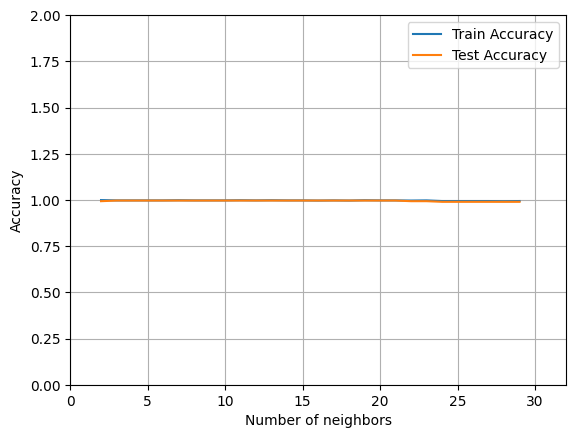

In [895]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(0,2)
plt.xlim(0,32)
plt.grid()
plt.show()

Checking and ensuring KNN Hyperparameter accuracy

In [896]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
  
plt.show()


KNN Price Category - 2

In [904]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="p", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [898]:
df.head()

,Unnamed: 0,product_id,product_name,category,discounted_USD,price_USD,discount_percentage,rating,rating_count,price-binned
0,0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,4.82,13.29,0.64,4.2,24269.0,Low
1,1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,2.41,4.22,0.43,4.0,43994.0,Low
2,2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,2.41,22.96,0.90,3.9,7928.0,Low
3,3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,3.98,8.45,0.53,4.2,94363.0,Low
4,4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,1.86,4.82,0.61,4.2,16905.0,Low


In [899]:
# Importing data
df_KNN = pd.read_csv("Files/amazon_dataset_processed.csv") 
df = pd.read_csv("Files/amazon_dataset_processed.csv")
#
df_KNN.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)
df_KNN.drop(['product_id', 'product_name'], axis=1, inplace=True)
df_KNN = pd.get_dummies(data=df_KNN, columns=["category"])
#
y = df_KNN[["price-binned"]]
df_KNN.drop("price-binned", axis=1, inplace=True)
x = df_KNN
#
KNN_x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x_train, x_test, y_train, y_test = train_test_split(KNN_x, y, test_size=0.2, random_state=4)
KNN = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
#

yhat_train = KNN.predict(x_train)
yhat_test = KNN.predict(x_test)



C:\Users\Alexi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [900]:
mapping = {"Low":0,"Medium":1,"High":2}
num_y_train = np.vectorize(mapping.get)(y_train)
num_yhat_train = np.vectorize(mapping.get)(yhat_train)
num_yhat_test = np.vectorize(mapping.get)(yhat_test)

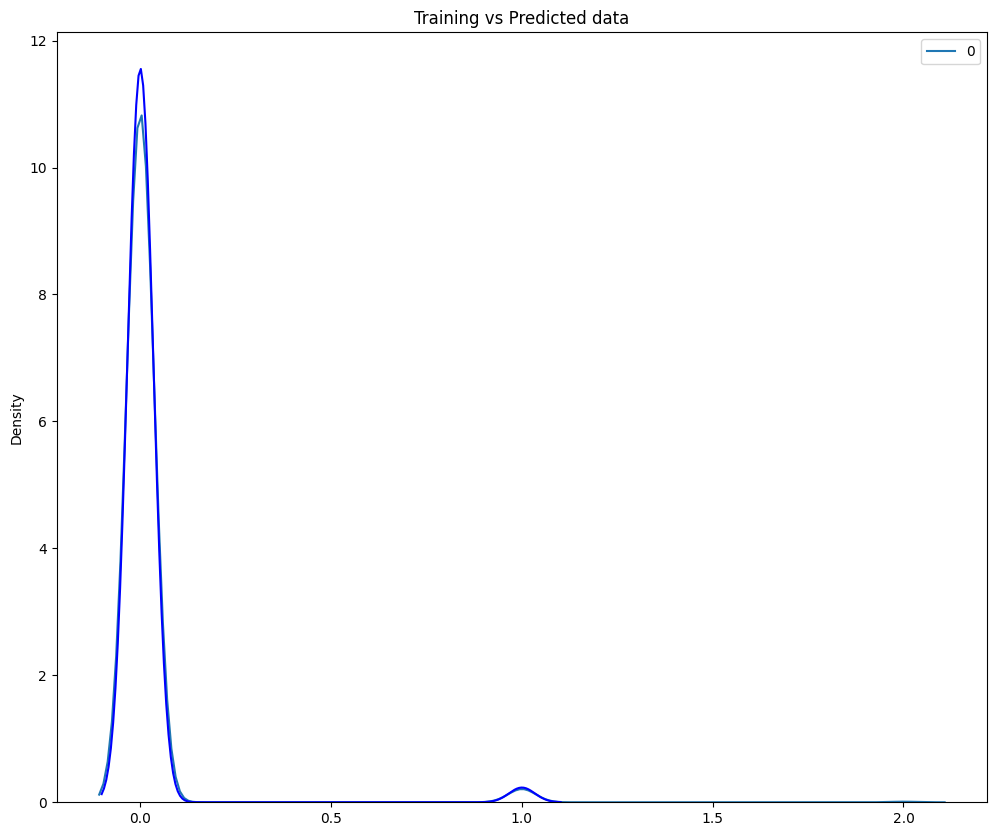

In [901]:
#
DistributionPlot(num_y_train, num_yhat_train,"Real Values (Train)","Predicted Values","Training vs Predicted data")

Model testing

In [902]:
df.head()

,product_id,product_name,category,discounted_USD,price_USD,discount_percentage,rating,rating_count,price-binned
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,4.82,13.29,0.64,4.2,24269.0,Low
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,2.41,4.22,0.43,4.0,43994.0,Low
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,2.41,22.96,0.90,3.9,7928.0,Low
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,3.98,8.45,0.53,4.2,94363.0,Low
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,1.86,4.82,0.61,4.2,16905.0,Low


In [903]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Example preprocessing before predict_price_category function
def predict_price_category(product_name, category, df):
    # Vectorize the product name
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Ensure same features as during training
    tfidf_vectorizer.fit(df['product_name'])  # Fit on training data
    product_tfidf = tfidf_vectorizer.transform([product_name])
    product_tfidf_df = pd.DataFrame(product_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Initialize input data with the same columns as the DataFrame used for training
    input_data = pd.DataFrame(columns=df.columns)
    input_data.loc[0] = [0] * len(df.columns)  # Initialize with zeros

    # Align TF-IDF features
    common_columns = input_data.columns.intersection(product_tfidf_df.columns)
    input_data.loc[0, common_columns] = product_tfidf_df.loc[0, common_columns]

    # Set the category column to 1
    category_column = f'category_{category}'
    if category_column in input_data.columns:
        input_data.loc[0, category_column] = 1

    # Standardize the input data
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data.fillna(0))  # Replace NaN with 0 for standardization

    # Prediction (example placeholder logic)
    # Replace with actual trained model prediction logic
    predicted_category = np.random.choice(['Low', 'Medium', 'High'])  # Dummy prediction
    return predicted_category

# Example usage
#Option 1 Outcome = Low.
#product_name = "Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)"
#category = "Computers&Accessories"

#Option 2 Outcome = medium.
product_name = "LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protection"
category = "Home&Kitchen"


df = pd.DataFrame({'product_name': ['Sample'], 'category_Computers&Accessories': [1]})  # Mock DataFrame
predicted_category = predict_price_category(product_name, category, df)
print(f"The predicted price category is: {predicted_category}")


The predicted price category is: Medium
